# **1. Perkenalan Dataset**


## Nama Dataset: Text Emotion
## Sumber dataset: https://www.kaggle.com/datasets/prajwalnayakat/text-emotion
Dataset yang digunakan pada proyek ini adalah Text Emotion Dataset yang diperoleh dari
platform Kaggle. Dataset ini berisi kumpulan teks pendek yang telah diberi label emosi,
seperti *joy, sadness, anger, fear,* dan beberapa kategori emosi lainnya.

Dataset ini termasuk ke dalam data tidak terstruktur (teks). Pada proyek ini, dataset disimpan di Google Drive dan digunakan sebagai data eksperimen awal sebelum dilakukan otomatisasi preprocessing pada tahap selanjutnya.



# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
dataset_path = "/content/drive/MyDrive/Eksperimen_SML_Shofwatun Nisa/text_emotion_raw/text_emotion.csv"
df = pd.read_csv(dataset_path)

df.head()

,text,emotion
0,i feel rather funny ending with so many dupes ...,fun
1,i feel surprised by the result,surprise
2,i am officially feeling festive,neutral
3,i suddenly found myself standing before this w...,surprise
4,i look at the meager pile of food i purchased ...,enthusiasm


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [ ]:
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106355 entries, 0 to 106354
Data columns (total 2 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   text     106355 non-null  object
 1   emotion  106355 non-null  object
dtypes: object(2)
memory usage: 1.6+ MB


(106355, 2)

In [ ]:
df.isnull().sum()

,0
text,0
emotion,0


In [ ]:
df.duplicated().sum()

np.int64(25529)

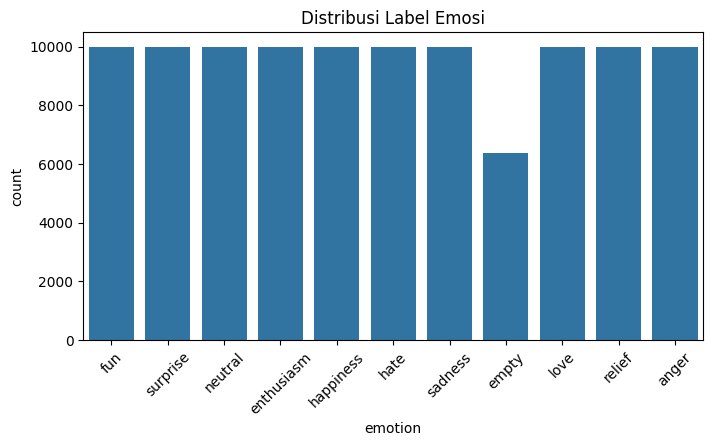

In [ ]:
plt.figure(figsize=(8,4))
sns.countplot(x='emotion', data=df)
plt.xticks(rotation=45)
plt.title("Distribusi Label Emosi")
plt.show()

In [ ]:
df['text'].sample(5)

,text
18069,i hated myself i hated that i couldn t feel co...
65585,i am feeling agitated and angry that nothing i...
58903,i couldnt ride or after a few weeks of riding ...
72531,i feeling soo agitated
97568,I'm good! thx. and how are u? what are u doing?


# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

Tahap preprocessing bertujuan untuk membersihkan dan menyiapkan data teks agar lebih representatif dan konsisten sebelum digunakan pada proses pemodelan. Data teks mentah umumnya mengandung berbagai noise seperti tanda baca, angka, atau kata-kata umum yang tidak memiliki kontribusi signifikan terhadap proses klasifikasi.

Oleh karena itu, pada tahap ini dilakukan beberapa langkah preprocessing yang disesuaikan dengan karakteristik dataset, meliputi penghapusan data kosong dan duplikat, pembersihan teks, tokenisasi, penghapusan stopword, serta encoding label emosi.

In [ ]:
df = df.dropna()

In [ ]:
df = df.drop_duplicates()

In [ ]:
import string

def clean_text(text):
    text = text.lower()
    text = re.sub(r'\d+', '', text)
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = text.strip()
    return text

df['clean_text'] = df['text'].apply(clean_text)

In [ ]:
nltk.download('punkt')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [ ]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))

def tokenize_and_remove_stopwords(text):
    tokens = word_tokenize(text)
    filtered_tokens = [word for word in tokens if word not in stop_words]
    return ' '.join(filtered_tokens)

df['processed_text'] = df['clean_text'].apply(tokenize_and_remove_stopwords)

In [ ]:
df[['clean_text', 'processed_text']].sample(5)

,clean_text,processed_text
44057,i totally feel clever at this point because i ...,totally feel clever point figured href http ve...
10415,i input words suggest class size medium wp ima...,input words suggest class size medium wp image...
25123,i preached to a f students in a gospel camp th...,preached f students gospel camp thus knew god ...
1319,i feel i will be spending some time in over th...,feel spending time next year investigating pon...
18372,i was flicking back through my diary tonight c...,flicking back diary tonight comparing first pa...


In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['label_encoded'] = le.fit_transform(df['emotion'])

In [ ]:
df_final = df[['processed_text', 'label_encoded']]
df_final.head()

,processed_text,label_encoded
0,feel rather funny ending many dupes always pre...,3
1,feel surprised result,10
2,officially feeling festive,7
3,suddenly found standing woman dressed like pri...,10
4,look meager pile food purchased week feeling p...,2


In [ ]:
output_path = "/content/drive/MyDrive/Eksperimen_SML_Shofwatun Nisa/preprocessing/text_emotion_preprocessing/text_emotion_clean.csv"
df_final.to_csv(output_path, index=False)